In [1]:
#Import libraries
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import squareform,cdist,euclidean

import random

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale,StandardScaler
from sklearn.decomposition import PCA


In [2]:
def rounding_m(num,n):
    if isinstance(num,str):
        raise TypeError('Should be a Number')
    else:
        sign_symbol = np.sign(num)
        z = abs(num)*10**n
        z = z+.5000000000001
        z = np.trunc(z)
        z = z/10**n*sign_symbol
    return z

# Conceptual

### 1. This problem involves the K-means clustering algorithm

### (a) Prove (10.12).
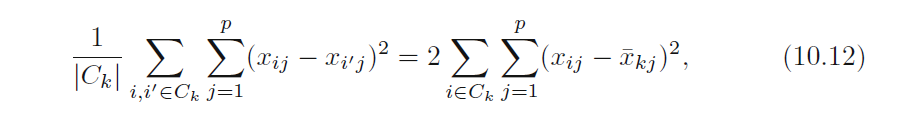

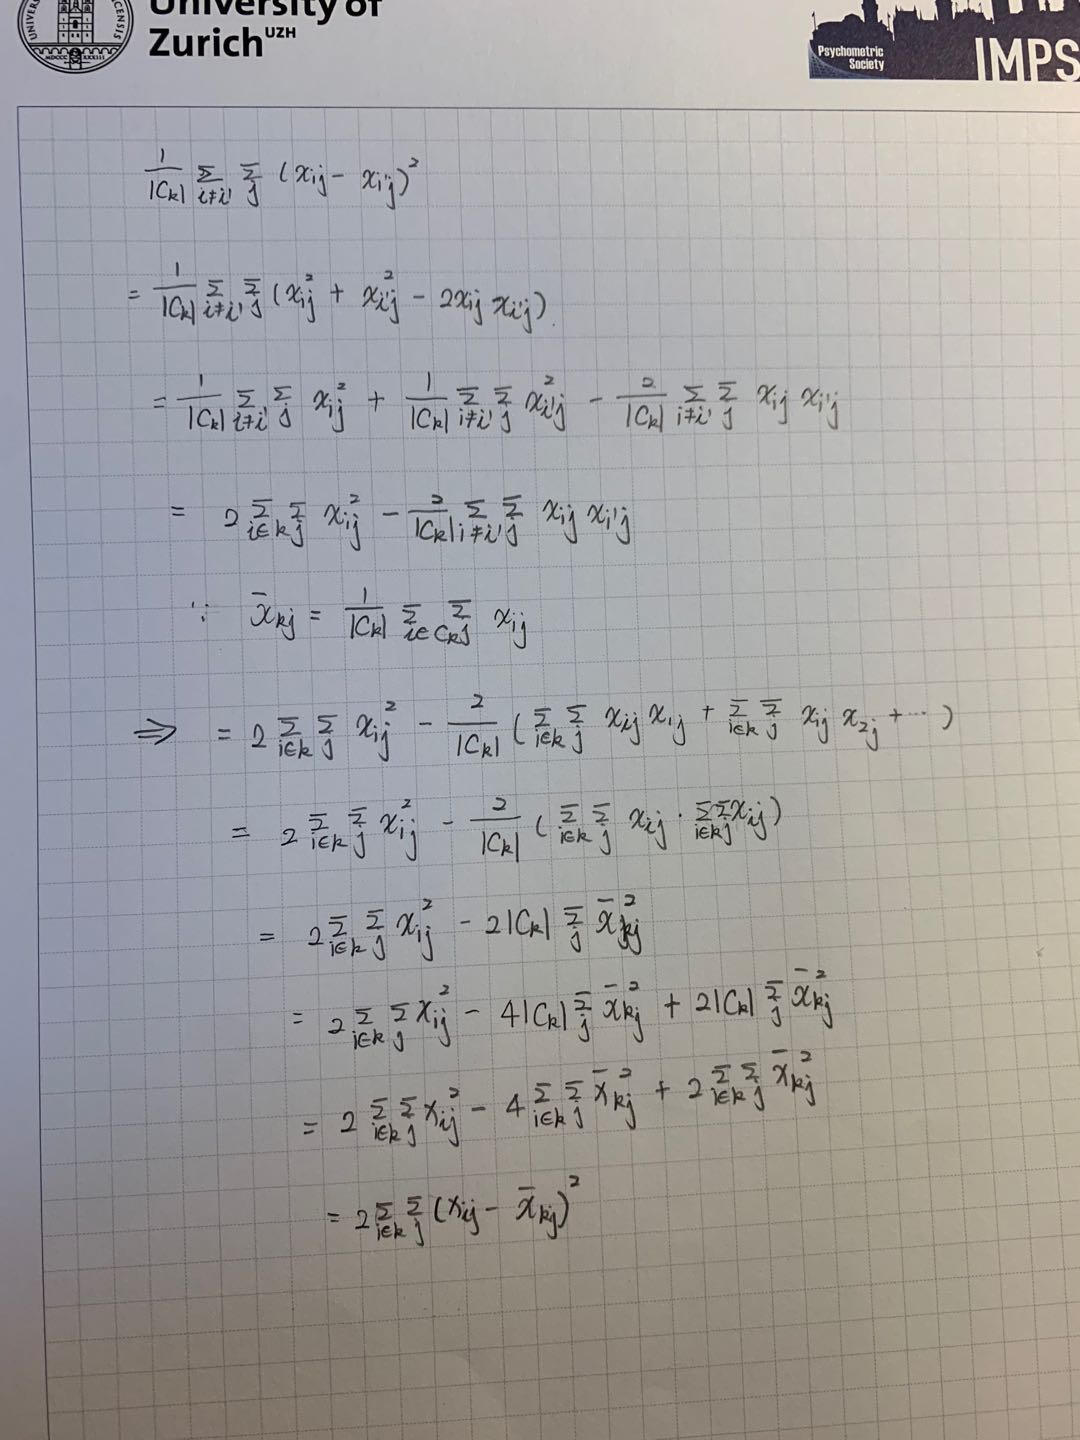

In [1]:
from IPython.display import Image
Image("./10_1(a).jpg")

### (b) On the basis of this identity, argue that the K-means clustering algorithm (Algorithm 10.1) decreases the objective (10.11) at each iteration.
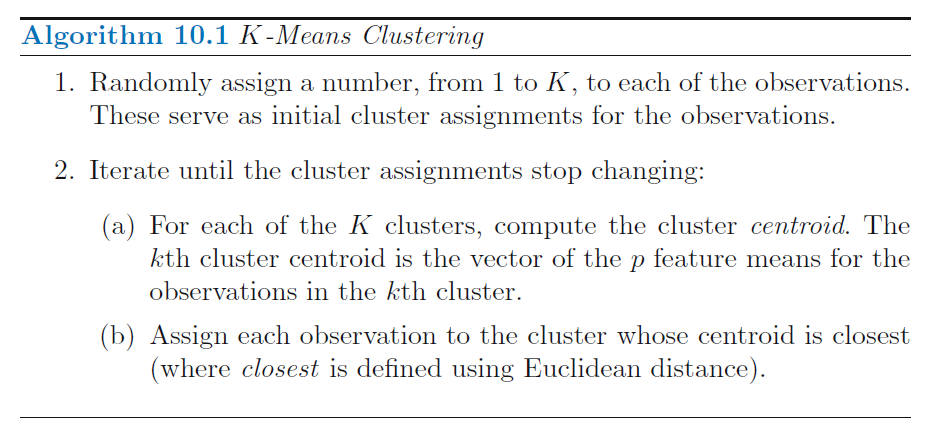

### 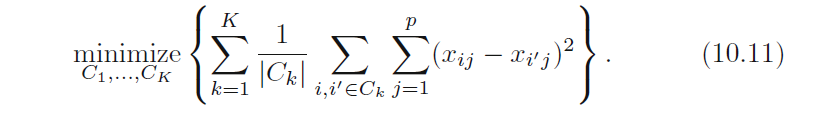

### Ans.

- Based on the (a) equation, it was known that the target is to minimize the distance between each observation and the mean within the clustering. After each obseravation, the sum of the squared differences shoule decrease as you reassign cluster membership to the observations that they are closest to the mean, and the traget should be realized

### 2. Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
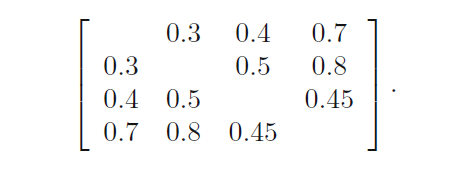

### For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

### (a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

In [3]:
dist_mat = [[0,.3,.4,.7],[.3,0,.5,.8],[.4,.5,0,.45],[.7,.8,.45,0]]

In [4]:
#Calculate the pairwise dissimilarity
dists =squareform(dist_mat)
dists

array([0.3 , 0.4 , 0.7 , 0.5 , 0.8 , 0.45])

In [13]:
#Establish libkage between observations (i.e., clusters) using 'complete method'
linkage_matrix = linkage(dists,'complete')
linkage_matrix

array([[0.  , 1.  , 0.3 , 2.  ],
       [2.  , 3.  , 0.45, 2.  ],
       [4.  , 5.  , 0.8 , 4.  ]])

Text(0, 0.5, 'Dissimilarity')

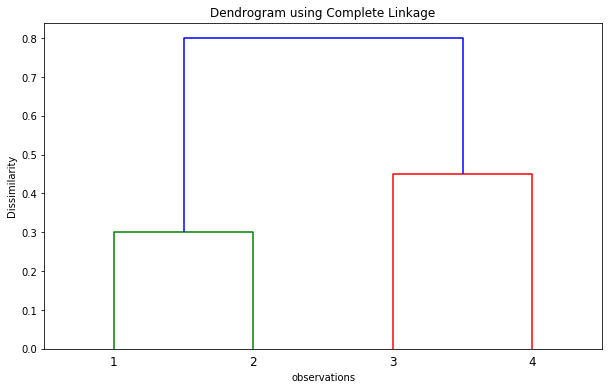

In [16]:
#Plot dendrogram
plt.figure(figsize = (10,6))
deng = dendrogram(linkage_matrix,labels =['1','2','3','4'])
plt.title('Dendrogram using Complete Linkage')
plt.xlabel('observations')
plt.ylabel('Dissimilarity')

### (b) Repeat (a), this time using single linkage clustering.

In [17]:
#Using clustering linkage
cluster_link = linkage(dists,'single')
cluster_link

array([[0.  , 1.  , 0.3 , 2.  ],
       [2.  , 4.  , 0.4 , 3.  ],
       [3.  , 5.  , 0.45, 4.  ]])

Text(0, 0.5, 'Dissimilarity')

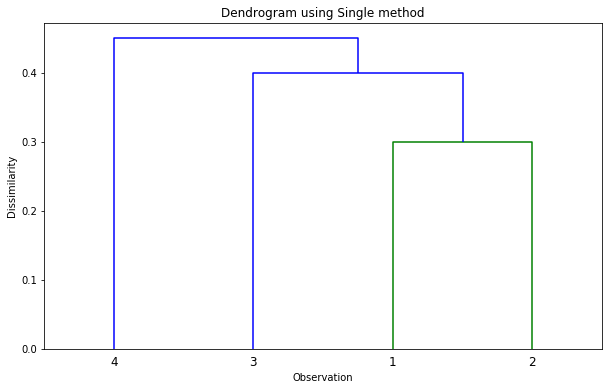

In [20]:
plt.figure(figsize = (10,6))
cluster_den = dendrogram(cluster_link,labels =['1','2','3','4'])
plt.title('Dendrogram using Single method')
plt.xlabel('Observation')
plt.ylabel('Dissimilarity')

### (c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?

- Two clusters: 1&2 in cluster A and 3&4 in cluster B

### (d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?

- Two clusters: 1,2,3 in Cluster A and 4 in cluster B

### (e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

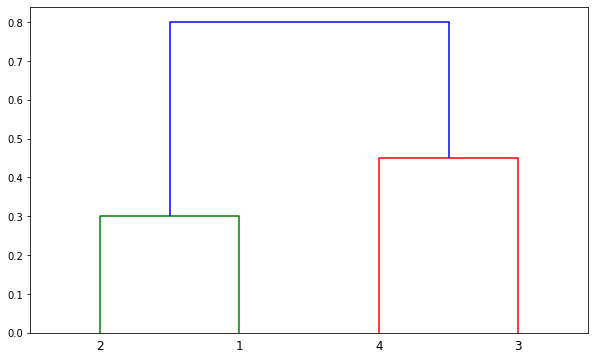

In [21]:
plt.figure(figsize = (10,6))
_ = dendrogram(linkage_matrix,labels =['2','1','4','3'])


### 3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.
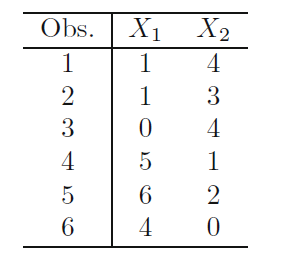

In [49]:
df = pd.DataFrame({'X1':[1,1,0,5,6,4],'X2':[4,3,4,1,2,0]})

df

,X1,X2
0,1,4
1,1,3
2,0,4
3,5,1
4,6,2
5,4,0


### (a) Plot the observations.

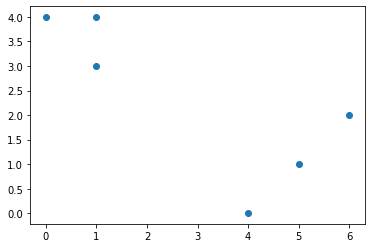

In [23]:
_ = plt.scatter('X1','X2',data = df)

### (b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

,X1,X2,label
0,1,4,A
1,1,3,A
2,0,4,A
3,5,1,A
4,6,2,B
5,4,0,A


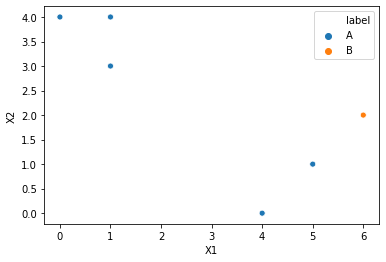

In [54]:
import random
label = ['A','B']

random.seed(123)

df['label'] = [i for i in random.choices(label,k = 6)]

#Re-plot by color
_ = sns.scatterplot(data = df,x= 'X1',y = 'X2',hue = 'label')

df

### (c) Compute the centroid for each cluster.

In [223]:
def centroid_est(df):
    c = {}
    for v in ['A','B']:
        c[v] = list(df[df['label'] == v].mean(axis = 0).round(2).values[:2])
    
    return c

In [224]:
#Calculate centroid of the data
c1 = centroid_est(df)
c1['A']

[2.2, 2.4]

### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [234]:
def reassign(df):
    '''For each observation in the dataset,
        calculate the euclidean distance for each of the cluster
        and compare, reassign the label of the observation to the 
        nereast euclidean distance'''
    data = df.copy()
    clusters_init = centroid_est(data) #Generate a new label for each observation
    clusters = {}
    iteration = 0
    while clusters_init != clusters:
        clusters_init = clusters
        clusters = centroid_est(data)
        print(f'For iterations {iteration}, the centroid for Cluster A is: ', clusters['A'])
        print(f'For iterations {iteration}, the centroid for Cluster B is: ' , clusters['B'])
        print('The membership is:\n ', data['label'])
        data['grp1']= data.apply(lambda x: np.sqrt((x['X1']-clusters['A'][0])**2 +(x['X2'] - clusters['A'][1])**2),axis = 1)
        data['grp2']= data.apply(lambda x: np.sqrt((x['X1']-clusters['B'][0])**2 +(x['X2'] - clusters['B'][1])**2),axis = 1)
        data['label'] = np.where(data['grp1'] < data['grp2'],'A','B')
        iteration+=1  
    return data

In [236]:
final  = reassign(df)
final

For iterations 0, the centroid for Cluster A is:  [2.2, 2.4]
For iterations 0, the centroid for Cluster B is:  [6.0, 2.0]
The membership is:
  0    A
1    A
2    A
3    A
4    B
5    A
Name: label, dtype: object
For iterations 1, the centroid for Cluster A is:  [0.67, 3.67]
For iterations 1, the centroid for Cluster B is:  [5.0, 1.0]
The membership is:
  0    A
1    A
2    A
3    B
4    B
5    B
Name: label, dtype: object
For iterations 2, the centroid for Cluster A is:  [0.67, 3.67]
For iterations 2, the centroid for Cluster B is:  [5.0, 1.0]
The membership is:
  0    A
1    A
2    A
3    B
4    B
5    B
Name: label, dtype: object


,X1,X2,label,grp1,grp2
0,1,4,A,0.466690,5.000000
1,1,3,A,0.746860,4.472136
2,0,4,A,0.746860,5.830952
3,5,1,B,5.087023,0.000000
4,6,2,B,5.585499,1.414214
5,4,0,B,4.955583,1.414214


### (f) In your plot from (a), color the observations according to the cluster labels obtained.

In [135]:
data

,X1,X2,label,grp1,grp2
0,1,4,A,2.000000,5.385165
1,1,3,A,1.341641,5.099020
2,0,4,A,2.720294,6.324555
3,5,1,A,3.130495,1.414214
4,6,2,B,3.820995,0.000000
5,4,0,A,3.000000,2.828427


In [240]:
x1 = [1,1,0,5,6,4]
x2 = [4,3,4,1,2,0]
M = np.column_stack((x1,x2))
M

array([[1, 4],
       [1, 3],
       [0, 4],
       [5, 1],
       [6, 2],
       [4, 0]])

Text(0, 0.5, 'X2')

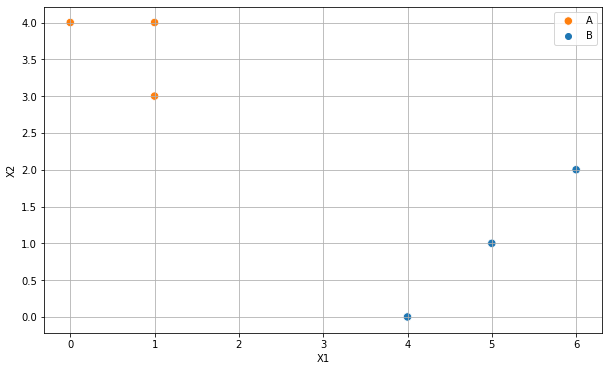

In [255]:
kmeans = KMeans(n_clusters = 2,random_state = 0 ).fit(M)
cluster_labels = kmeans.labels_

color=  ['red' if l == 0 else 'green' for l in cluster_labels]
fig = plt.figure(figsize = (10,6))
sns.scatterplot(x1,x2,hue = cluster_labels,s =70)
plt.grid()
plt.legend(['A','B'],loc = 'best')
plt.xlabel('X1')
plt.ylabel('X2')

### 4. Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.

### (a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

- I think there is not enough information to tell. Normally, if {1,2,3} and {4,5} are not on the same location respectively within a cluster, using complete linkage should have higher fusion point since it calculates the maximal distance between clusters while single linkage are calculating the minimal distance between the clusters. However, if they are at the same spot within cluster, the fusion point should be the same.

### (b) At a certain point on the single linkage dendrogram, the clusters {5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

- I think for this scenario, they should fusion at the same point, becuase within each of the cluster, there is only one observation

### 5. In words, describe the results that you would expect if you performed K-means clustering of the eight shoppers in Figure 10.14, on the basis of their sock and computer purchases, with K = 2. Give three answers, one for each of the variable scalings displayed. Explain.

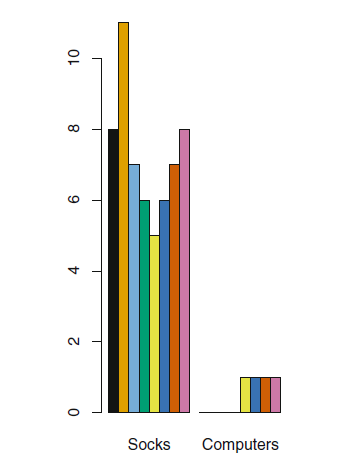
- (1) Based on the first plot, the variable did not scale at all, and the score observation should be {'black':(8,0) 'orange':(12,0),'blue': (7,0),'green': (6,0),'yellow':(5,1),'navy':(6,1),'red':(7,1),'pink':(8,1), so I would expect Stock will dominate the disimilarities between observations and clustering, so I would expect that {orange} will be in one cluster and {black,pink,blue,red,navy,green,yellow} will be in another cluster.

In [257]:
df1 = pd.DataFrame({'customer':['black','oranage','blue','green','yellow','navy','red','pink'],'Stock':[8,12,7,6,5,6,7,8],
                    'Computer':[0,0,0,0,1,1,1,1]})
df1

,customer,Stock,Computer
0,black,8,0
1,oranage,12,0
2,blue,7,0
3,green,6,0
4,yellow,5,1
5,navy,6,1
6,red,7,1
7,pink,8,1


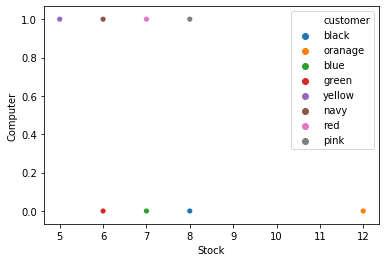

In [267]:
_ =sns.scatterplot(x = 'Stock',y = 'Computer',hue = 'customer',data =df1,)

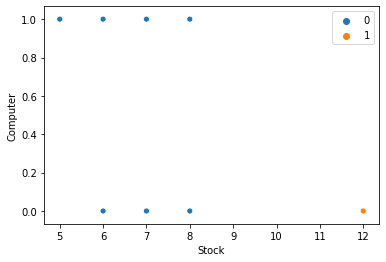

In [373]:
kmeans1 = KMeans(n_clusters = 2,random_state = 0).fit(df1[['Stock','Computer']])
kmeans1.labels_

_  = sns.scatterplot(x = 'Stock',y = 'Computer',data = df1,hue = kmeans1.labels_)

- The clustering demonstrated the above statement

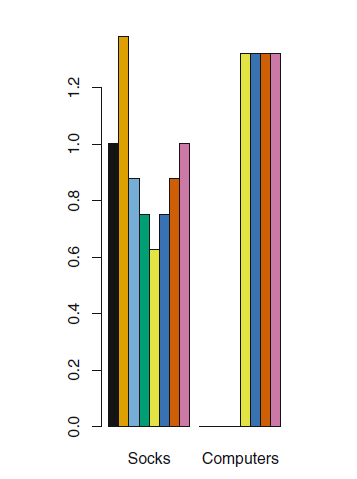
- (2) For the second plot, the variables are scaled and computer occupied large proportion. In this case, both the computer and stocks will be expeceted to dominant clustering. Based on the plot, it is hard to tell.

In [346]:
def scaling(series):
    return series/series.std()

In [360]:
df2 = df1.copy()
for i in ['Stock','Computer']:
    df2[i] = scaling(df2[i])

In [362]:
df2

,customer,Stock,Computer
0,black,3.748987,0.000000
1,oranage,5.623480,0.000000
2,blue,3.280363,0.000000
3,green,2.811740,0.000000
4,yellow,2.343117,1.870829
5,navy,2.811740,1.870829
6,red,3.280363,1.870829
7,pink,3.748987,1.870829


In [370]:
kmeans2 = KMeans(n_clusters = 2,random_state = 0).fit(df2[['Stock','Computer']])
kmeans2.labels_

array([1, 1, 1, 1, 0, 0, 0, 0])

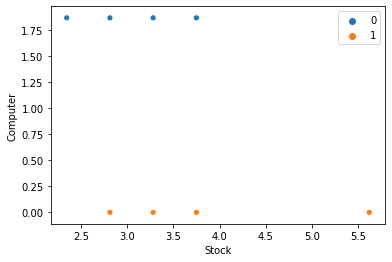

In [374]:
_ = sns.scatterplot(x = 'Stock',y = 'Computer',hue = kmeans2.labels_, data = df2)



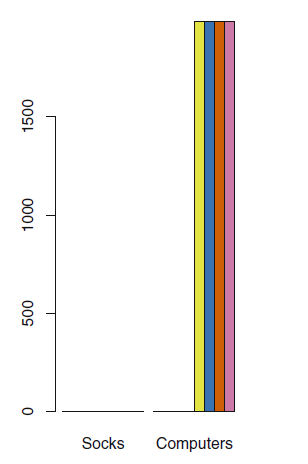
- (3) Based on the third plot, it was clear that computer dominates the clustering, therefore, {yellow,navy,red,pink} will be clustered together

### 6. A researcher collects expression measurements for 1,000 genes in 100 tissue samples. The data can be written as a 1, 000 × 100 matrix, which we call X, in which each row represents a gene and each column a tissue sample. Each tissue sample was processed on a different day, and the columns of X are ordered so that the samples that were processed earliest are on the left, and the samples that were processed later are on the right. The tissue samples belong to two groups: control (C) and treatment (T). The C and T samples were processed in a random order across the days. The researcher wishes to determine whether each gene’s expression measurements differ between the treatment and control groups.

### As a pre-analysis (before comparing T versus C), the researcher performs a principal component analysis of the data, and finds that the first principal component (a vector of length 100) has a strong linear trend from left to right, and explains 10% of the variation. The researcher now remembers that each patient sample was run on one of two machines, A and B, and machine A was used more often in the earlier times while B was used more often later. The researcher has a record of which sample was run on which machine.

### (a) Explain what it means that the first principal component “explains 10% of the variation”.

- Based on the description, The matrix n×p is 1000×100, this there are are most 100 principal components.The first principal component loading vector is a vector in the `feature space` along which the data varies the most. In this instance, it contains 10% of the variance of the original gene varaince, and doesn’t contain the other 90%.

### (b) The researcher decides to replace the (j, i)th element of X with
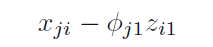
### where zi1 is the ith score, and φj1 is the jth loading, for the first principal component. He will then perform a two-sample t-test on each gene in this new data set in order to determine whether its expression differs between the two conditions. Critique this idea, and suggest a better approach. (The principal component analysis is performed on X^T ).

### https://stats.stackexchange.com/questions/222/what-are-principal-component-scores

# Applied

### 7. In the chapter, we mentioned the use of correlation-based distance and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if each observation has been centered to have mean zero and standard deviation one, and if we let rij denote the correlation between the ith and jth observations, then the quantity 1−rij is proportional to the squared Euclidean distance between the ith and jth observations. On the USArrests data, show that this proportionality holds. Hint: The Euclidean distance can be calculated using the dist() function, and correlations can be calculated using the cor() function.

In [5]:
USA = pd.read_csv('./Data/USArrests.csv',index_col = [0])

USA.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
USA.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [7]:
#Scale the variables: scaling for each observation
def scaling(series):
    mean = series.mean(axis = 0) #observation mean
    std = series.std(axis = 0) #observation std
    s_scale = series.apply(lambda x: (x-mean)/std)
    return s_scale   

In [8]:
df_scaled = USA.apply(scaling)

df_scaled.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820


In [114]:
#Calculate observation euclidean distance and 1-rij
d_euclidean = cdist(df_scaled[df_scaled.columns],df_scaled[df_scaled.columns],metric = 'euclidean')
d_corr = cdist(df_scaled[df_scaled.columns],df_scaled[df_scaled.columns],metric='correlation') #Calculate the correlation distance

In [181]:
a = pd.DataFrame(d_corr)
a.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.713831,1.446595e+00,0.087742,1.865922e+00,1.687231,1.713587,1.142818,0.104920,0.116252,...,0.297015,0.204103,0.935808,1.993661,0.404473,0.344547,1.956846,0.038404,1.793068,0.343285
1,0.713831,0.000000,8.307246e-01,0.367279,8.137128e-01,0.515556,1.861787,1.478874,0.786103,0.736703,...,0.138851,0.462862,1.698576,1.391660,0.083333,0.815220,0.998302,0.615247,1.776892,1.327709
2,1.446595,0.830725,2.220446e-16,1.176655,2.949018e-01,0.598381,0.775958,0.341154,1.040993,1.783970,...,1.249100,1.685184,1.814860,0.599214,1.189801,1.927490,0.448265,1.603402,0.995020,1.016712
3,0.087742,0.367279,1.176655e+00,0.000000,1.586313e+00,1.370925,1.898642,1.192026,0.142143,0.251176,...,0.114854,0.216121,1.318600,1.951209,0.180566,0.502613,1.755826,0.111267,1.972967,0.540090
4,1.865922,0.813713,2.949018e-01,1.586313,1.110223e-16,0.114623,0.663160,0.897325,1.700981,1.859518,...,1.334248,1.651479,1.534541,0.192387,1.204604,1.728990,0.032273,1.833753,0.616535,1.700464


In [184]:
#Convert the distance matrix into 1-D array without duplicates
def reshape_df(mat,rg=50):
    empty = []
    for i in range(rg):
        mat_list = list(mat[i]) #Change array to the list
        empty+=mat_list[i+1:] #select all elements of the list after 0
        
    return empty

In [193]:
euclidean = np.array(reshape_df(d_euclidean))

In [194]:
corr = np.array(reshape_df(d_corr))

In [199]:
equi_check = corr/euclidean**2

min_equi = np.min(equi_check)
max_equi = np.max(equi_check)
median_equi = np.median(equi_check)
mean_equi = np.mean(equi_check)

df_f = pd.DataFrame({'min':[min_equi],'median':[median_equi],'mean':[mean_equi],'max':[max_equi]})

In [200]:
df_f

,min,median,mean,max
0,0.000086,0.133943,0.234193,4.887686


- If K = .1339

In [202]:
equi_meancheck = corr-.1339*euclidean**2
np.mean(equi_meancheck)

-0.059043233663784986

- It can be seen that the two measures are almost the same

### 8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8.We also saw that the PVE can be obtained using the sdev output of the prcomp() function. On the USArrests data, calculate PVE in two ways:
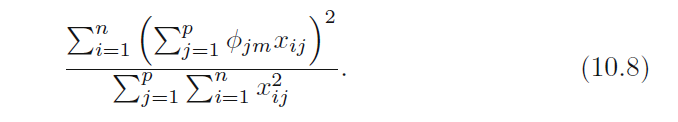

### (a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4,random_state  = 0).fit(df_scaled)


In [14]:
pve = pca.explained_variance_ratio_

pve

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

### (b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [26]:
pcafit = PCA(n_components = 4,random_state=0).fit(df_scaled)

loadings = pd.DataFrame(pcafit.components_.T,columns =['PC1','PC2','PC3','PC4'],index = list(df_scaled.columns))
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [28]:
def pve_cal(df = df_scaled,m = 'PC1'):
    total_var = np.square(df).sum(axis = 1).sum(axis = 0)
    pca = np.square((loadings[m].T*df).sum(axis = 1)).sum()
    pve = pca/total_var
    return pve

In [34]:
print('The proportion of variance explained by each of the principal component is:\n')
print([pve_cal(),pve_cal(m = 'PC2'),pve_cal(m = 'PC3'),pve_cal(m = 'PC4')])

The proportion of variance explained by each of the principal component is:

[0.6200603947873736, 0.24744128813496052, 0.08914079514520744, 0.04335752193245879]


### 9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [35]:
from scipy.cluster.hierarchy import linkage,dendrogram

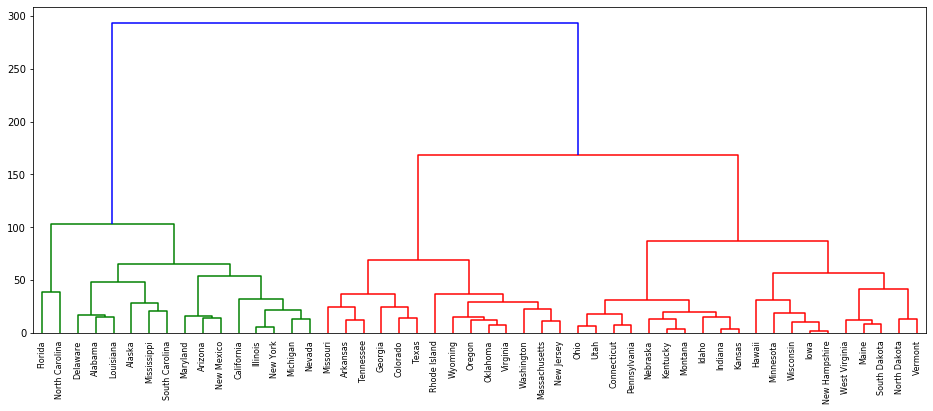

In [40]:
cluster_1 = linkage(USA,method='complete',metric = 'euclidean')

plt.figure(figsize = (16,6))
_ = dendrogram(cluster_1,labels = list(USA.index))

### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

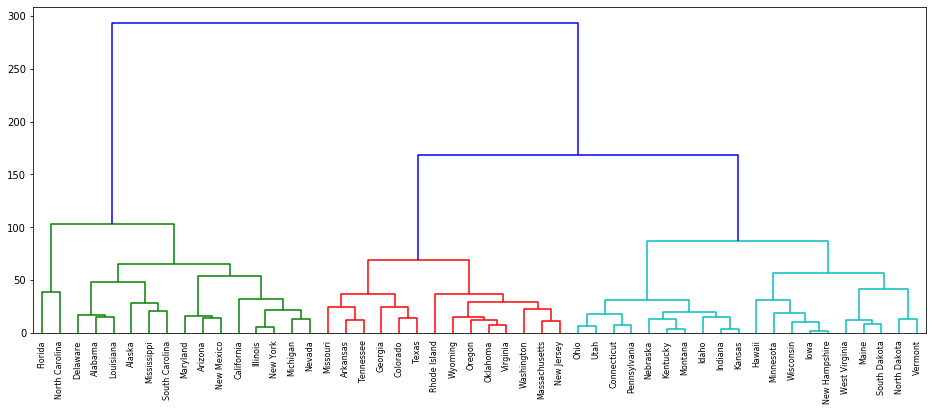

In [41]:
plt.figure(figsize = (16,6))
_ = dendrogram(cluster_1,labels = list(USA.index),color_threshold=150)

### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [44]:
df_std1 = USA.apply(lambda x: x/x.std(axis = 0),axis = 1)

In [45]:
cluster_2 = linkage(df_std1,method = 'complete',metric = 'euclidean')

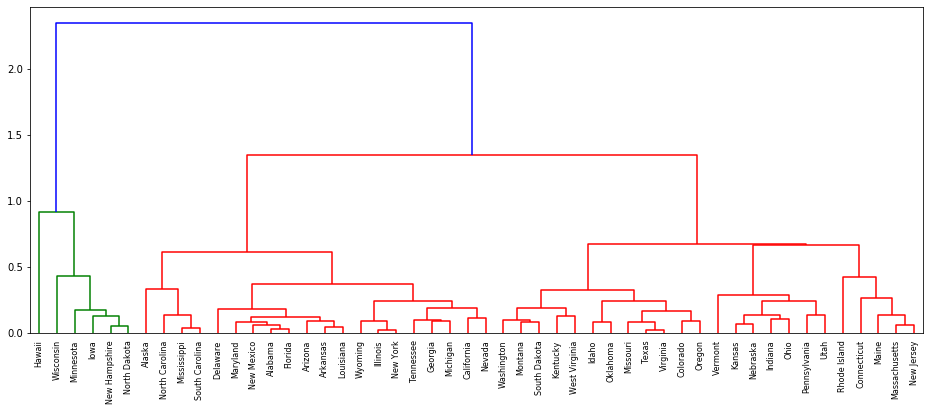

In [46]:
plt.figure(figsize = (16,6))
_ = dendrogram(cluster_2,labels = list(USA.index))

### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

- It seems that after scaling, the euclidean distance changed a lot among observations, observations that belong to the different clusters are now belong to the same cluster after scaling. Except that you want some specific features contribute more to the calulation of euclidean distance, features should be scaled before clustering

### 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [6]:
np.random.seed(0)
c1 = np.append(np.random.normal(3,1,(20,50)),np.full((20,1),1),axis = 1)
c2 = np.append(np.random.normal(-2,2,(20,50)),np.full((20,1),2),axis = 1)
c3 = np.append(np.random.normal(5,1,(20,50)),np.full((20,1),3),axis =1)

In [7]:
df_sim = pd.DataFrame(np.row_stack((c1,c2,c3)))
df_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,4.764052,3.400157,3.978738,5.240893,4.867558,2.022722,3.950088,2.848643,2.896781,3.410599,...,1.579982,1.293730,4.950775,2.490348,2.561926,1.747205,3.777490,1.386102,2.787260,1.0
1,2.104533,3.386902,2.489195,1.819368,2.971818,3.428332,3.066517,3.302472,2.365678,2.637259,...,4.222445,3.208275,3.976639,3.356366,3.706573,3.010500,4.785870,3.126912,3.401989,1.0
2,4.883151,1.652241,1.729515,3.969397,1.826877,4.943621,2.586381,2.252545,4.922942,4.480515,...,3.439392,3.166673,3.635031,5.383145,3.944479,2.087178,4.117016,1.684093,2.538415,1.0
3,2.931758,4.713343,2.255245,2.173561,2.901547,2.336522,4.126636,1.920068,1.852531,2.562180,...,3.267051,2.960717,1.831907,3.523277,2.828454,3.771791,3.823504,5.163236,4.336528,1.0
4,2.630818,2.760621,4.099660,3.655264,3.640132,1.383044,2.975674,2.261969,3.279925,2.901850,...,2.602728,2.867119,2.702209,2.690987,1.323996,4.152332,4.079619,2.186636,1.533576,1.0


### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca_fit = PCA(n_components=2,random_state=0).fit_transform(df_sim.iloc[:,:50])

In [10]:
df_pca = pd.DataFrame(pca_fit,columns = ['PC1','PC2'])
df_pca['label'] = df_sim[[50]]

df_pca['label'] = df_pca['label'].astype(int)

df_pca.head()

,PC1,PC2,label
0,-8.316709,0.442966,1
1,-7.232819,0.271358,1
2,-9.007009,-2.117566,1
3,-6.699472,0.392640,1
4,-6.456537,1.284938,1


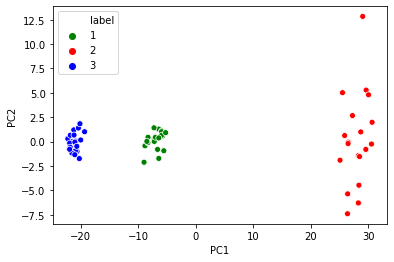

In [11]:
_ = sns.scatterplot(x = 'PC1',y = 'PC2',hue = 'label',palette={1:'green',2:'red',3:'blue'},data = df_pca)

### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans_f1 = KMeans(n_clusters=3,random_state = 0).fit(df_sim)

kmeans_f1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- The KMeans does well on clustering the original simulated data

### (d) Perform K-means clustering with K = 2. Describe your results.

In [14]:
kmeans_f2 = KMeans(n_clusters=2,random_state=0).fit(df_sim)

kmeans_f2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- KMeans clustered the original class 1 and class 3 together, and succesfully clustered the original class 2; in the original simulated data, the class 1 and class 3 had similar means

In [15]:
df_pca['label_k2'] = kmeans_f2.labels_

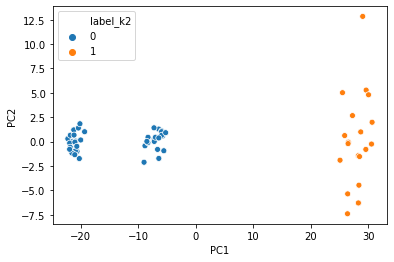

In [16]:
_ = sns.scatterplot(x = 'PC1',y = 'PC2', hue = 'label_k2',data = df_pca)

### (e) Now perform K-means clustering with K = 4, and describe your results.

In [17]:
kmeans_f3 = KMeans(n_clusters=4,random_state=0).fit(df_sim)

kmeans_f3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

- KMeas does able to cluster original class 3 sucessfully, and clustered the original class 2 into two small clusters, which might be due to higher variance of the original class2

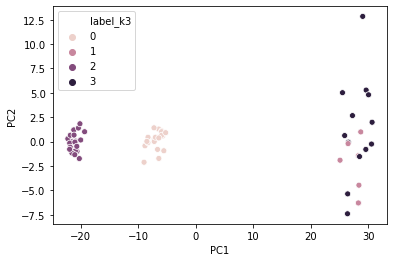

In [18]:
df_pca['label_k3'] = kmeans_f3.labels_

_ = sns.scatterplot(x ='PC1',y = 'PC2',hue = 'label_k3',data = df_pca)

### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [19]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters = 3,random_state = 1).fit(df_pca.iloc[:,:2])

kmeans_pca.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

- In this case, perform K-means on the first 2 principle data instead of raw data obtained good results compared to the true clustering, it might becuase the first 2 principle components explained the most variance of the data

### (g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [28]:
def scaled(series):
    scaled = series/series.std(axis = 0)
    return scaled
    
df_simscaled = df_sim.iloc[:,:50].apply(scaled)

In [29]:
df_simscaled.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.467945,1.063318,1.239744,1.710152,1.470887,0.622375,1.205874,0.915620,0.904378,1.003717,...,0.575354,0.501636,0.410268,1.451995,0.809901,0.835838,0.502426,1.057292,0.437275,0.876782
1,0.648469,1.059173,0.775614,0.593676,0.898029,1.054870,0.936139,1.061491,0.738567,0.776128,...,0.765633,1.340604,1.017409,1.166294,1.091545,1.209284,0.865699,1.339531,0.986450,1.070156
2,1.504642,0.516699,0.538903,1.295251,0.552049,1.521112,0.789564,0.724020,1.536948,1.318586,...,0.444829,1.091989,1.004216,1.066105,1.750686,1.286902,0.600189,1.152323,0.531282,0.798504
3,0.903361,1.473986,0.702717,0.709253,0.876795,0.718929,1.259770,0.617154,0.578362,0.754033,...,0.503325,1.037272,0.938903,0.537273,1.145826,0.922794,1.084616,1.070171,1.628851,1.364132
4,0.810632,0.863318,1.277422,1.192746,1.099981,0.425551,0.908407,0.727049,1.023996,0.853995,...,0.696565,0.826353,0.909222,0.792521,0.875152,0.431959,1.194044,1.141856,0.689820,0.482413


In [30]:
scaled_Kmeans = KMeans(n_clusters = 3,random_state = 0).fit(df_simscaled.iloc[:,:50])
scaled_Kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- The model performed well on scaled data

### 11. On the book website, www.StatLearning.com, there is a gene expression data set (Ch10Ex11.csv) that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

In [34]:
gene = pd.read_csv('./Data/Ch10Ex11.csv',header = None)
gene.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216726,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


### (b) Apply hierarchical clustering to the samples using correlationbased distance, and plot the dendrogram. Do the genes separate the samples into the two groups? Do your results depend on the type of linkage used?

In [35]:
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering

In [38]:
#First: use complete linkage
complete_cluster = linkage(gene.T,metric = 'correlation',method = 'complete')

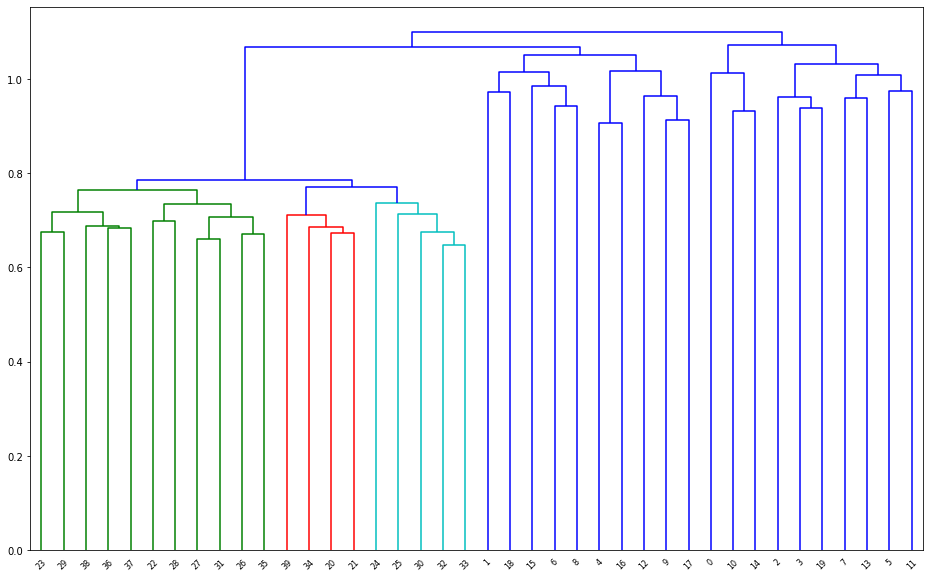

In [39]:
plt.figure(figsize = (16,10))
dendro_complete = dendrogram(complete_cluster,labels = list(gene.columns))

- Based on the complete linking method, you can do clustering 2 by setting the threshold at about 1.1

In [41]:
single_cluster = linkage(gene.T,metric = 'correlation',method = 'single')

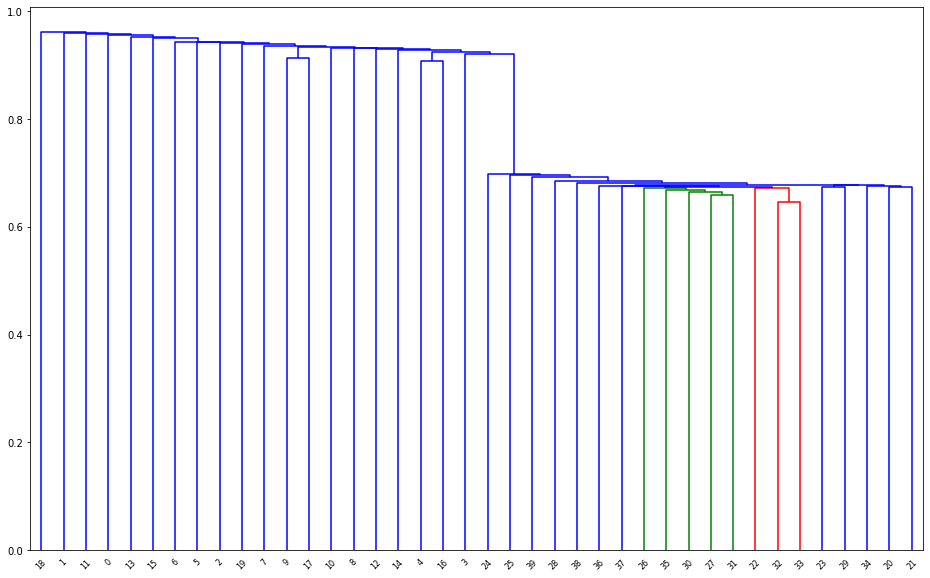

In [42]:
plt.figure(figsize = (16,10))
dendro_singe = dendrogram(single_cluster,labels = list(gene.columns))

- By using single linkage, it's hard to cluster the gene samples into 2 clusters

### (c) Your collaborator wants to know which genes differ the most across the two groups. Suggest a way to answer this question, and apply it here.

- I think he can do multiple t test to see which comparisons are significant and calculate the effect size of the results. However, since there are so many genes, the multiple t-tests should be conducted after controlling Type I error rate. The Bonferroni's correction or FDR can be applied.